In [1]:
%cd /home/aditya/Documents/SOMBL/
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from tqdm import tqdm
import seaborn as sns

import scripts.plot_utils as putils
import scripts.plot_densities as pdens
import scripts.calc_grgrstar_funcs  as grfuncs


%config InlineBackend.figure_format = 'svg'

sns.set()

/home/aditya/Documents/SOMBL


In [2]:
def get_oneset_data(length, pattern):
    # df = pd.read_csv(f"data/spin_imbalances_twoset_error_sample_L{length}_{pattern}.dat")
    df = pd.read_csv(f"data/spin_imbalances_error_L{length}_{pattern}.dat")
    # df = pd.read_csv(f"data/charge_imbalances_error_L{length}_{pattern}.dat")
    
    complex_types = {
        'spin_up_imb_S_plus': complex,
        'spin_up_imb_S_minus': complex,
        'spin_up_imb_S_x': complex,
        'spin_up_imb_S_y': complex,
        'spin_up_imb_S_z': complex,
        # 'staggered_mag_z': complex,

        'spin_up_imb_S_plus_var': complex,
        'spin_up_imb_S_minus_var': complex,
        'spin_up_imb_S_x_var': complex,
        'spin_up_imb_S_y_var': complex,
        'spin_up_imb_S_z_var': complex,
        # 'staggered_mag_z_var': complex,
    }
    df = df.astype(complex_types)
    return df

def get_twoset_data(length, pattern):
    df = pd.read_csv(f"data/spin_imbalances_twoset_error_sample_L{length}_{pattern}.dat")
    # df = pd.read_csv(f"data/spin_imbalances_error_L{length}_{pattern}.dat")
    # df = pd.read_csv(f"data/charge_imbalances_error_L{length}_{pattern}.dat")
    
    complex_types = {
        'spin_up_imb_S_plus': complex,
        'spin_up_imb_S_minus': complex,
        'spin_up_imb_S_x': complex,
        'spin_up_imb_S_y': complex,
        'spin_up_imb_S_z': complex,
        # 'staggered_mag_z': complex,

        'spin_up_imb_S_plus_var': complex,
        'spin_up_imb_S_minus_var': complex,
        'spin_up_imb_S_x_var': complex,
        'spin_up_imb_S_y_var': complex,
        'spin_up_imb_S_z_var': complex,
        # 'staggered_mag_z_var': complex,
    }
    df = df.astype(complex_types)
    return df

def get_charge_data(length, pattern):
    # df = pd.read_csv(f"data/spin_imbalances_twoset_error_sample_L{length}_{pattern}.dat")
    # df = pd.read_csv(f"data/spin_imbalances_error_L{length}_{pattern}.dat")
    df = pd.read_csv(f"data/charge_imbalances_error_L{length}_{pattern}.dat")
    return df

In [3]:
length = 100
dfspin = get_oneset_data(length, "alt_up_down")
dfcharge = get_oneset_data(length, "altn_altupdown_updown")

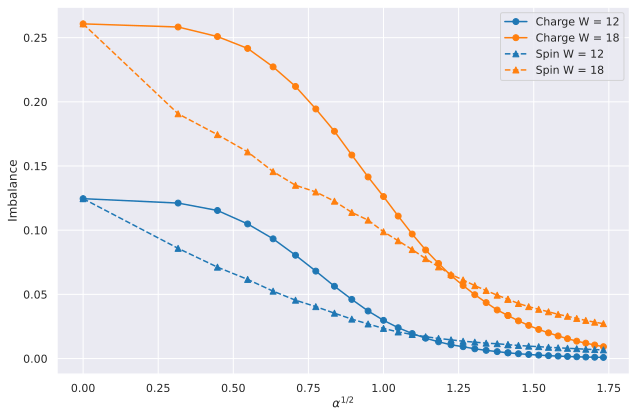

In [40]:
cmap = plt.cm.tab10
# couplings = [0, 0.5, 1, 1.5, 2, 2.5, 3.0]
disorders = [12, 18]
# colors = cmap(np.linspace(0, 1, len(disorders)))
colors = cmap(range(len(disorders)))


df = dfcharge
value = "spin_up_imb_charge"
imb_type = "PM"

plt.figure(figsize=(9,6))

for i in range(len(disorders)):  
    # coupling = couplings[i]
    disorder = disorders[i]
    data = df.loc[np.isclose(df["disorder"], disorder)]
    x = np.array(data["coupling"])**0.5
    y = np.real(data[value])
    # yerr = np.sqrt(-np.real(data[value + "_var"]))
    labels = data["disorder"]
    cmap = plt.cm.viridis
    plt.plot(x, y, marker="o", color=colors[i], label=f"Charge W = {disorder}")
    # for j in range(len(x)):
    #     # plt.errorbar(x[j], y[j], yerr=yerr[j], linestyle="", marker=".",
    #     #              color=colors[i], capsize=5, label=f"L = {length}")
    #     plt.scatter(x[j], y[j], marker="o",
    #                  color=colors[i], label=f"L = {length}")

df = dfspin

value = "spin_up_imb_S_z"
imb_type = "PM"
        
for i in range(len(disorders)):  
    # coupling = couplings[i]
    disorder = disorders[i]
    data = df.loc[np.isclose(df["disorder"], disorder)]
    x = np.array(data["coupling"])**0.5
    y = np.real(data[value])
    
    # yerr = np.sqrt(-np.real(data[value + "_var"]))
    labels = data["disorder"]
    cmap = plt.cm.viridis
    plt.plot(x, y, marker="^", color=colors[i], linestyle="--", label=f"Spin W = {disorder}")
    # for j in range(len(x)):
        # plt.errorbar(x[j], y[j], yerr=yerr[j], linestyle="", marker=".",
        #              color=colors[i], capsize=5, label=f"L = {length}")
        # plt.scatter(x[j], y[j], marker="^",
        #              color=colors[i], label=f"L = {length}")

        
plt.ylabel("Imbalance")
plt.xlabel(r"$\alpha^{1/2}$")
# plt.title(value + " " + imb_type)
# plt.xlim(-0.2, 2.5)
plt.legend()
plt.tight_layout()

# handles = []
# for i in range(len(disorders)):
#     handles.append(mpl.patches.Patch(color=colors[i], label=f"W = {disorders[i]}"))
# plt.legend(handles=handles, bbox_to_anchor=(1.3,1.0), loc="upper right")
# plt.legend(handles=handles, loc="upper right")
plt.legend(loc="upper right")
fname = "Imb_alt_up_down_S_z_vs_altn_altupdown_updown_charge_vs_coupling_root"
plt.savefig("plots/PNGs/" + fname + ".png")
plt.savefig("plots/PDFs/" + fname + ".pdf")

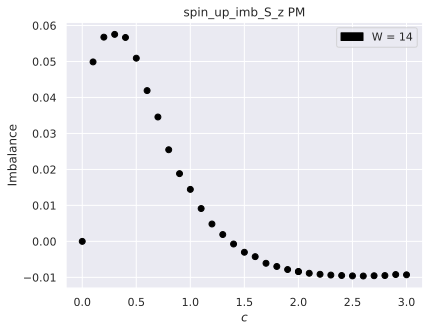

In [5]:
cmap = plt.cm.cubehelix
# couplings = [0, 0.5, 1, 1.5, 2, 2.5, 3.0]
disorders = [14]
colors = cmap(np.linspace(0, 1, len(disorders)))

df = dfcharge
valuecharge = "spin_up_imb_charge"
valuespin = "spin_up_imb_S_z"
imb_type = "PM"

for i in range(len(disorders)):  
    # coupling = couplings[i]
    disorder = disorders[i]
    dataspin = dfspin.loc[np.isclose(dfspin["disorder"], disorder)]
    datacharge = dfcharge.loc[np.isclose(dfcharge["disorder"], disorder)]
    x = np.array(dataspin["coupling"])
    y = np.real(datacharge[valuecharge]) - np.real(dataspin[valuespin])
    # yerr = np.sqrt(-np.real(data[value + "_var"]))
    labels = data["disorder"]
    cmap = plt.cm.viridis
    # plt.plot(x, y, marker="o", label=f"Random W = {disorder}")
    for j in range(len(x)):
        # plt.errorbar(x[j], y[j], yerr=yerr[j], linestyle="", marker=".",
        #              color=colors[i], capsize=5, label=f"L = {length}")
        plt.scatter(x[j], y[j], marker="o",
                     color=colors[i], label=f"L = {length}")


        
plt.ylabel("Imbalance")
plt.xlabel(r"$c$")
plt.title(value + " " + imb_type)
plt.legend()


handles = []
for i in range(len(disorders)):
    handles.append(mpl.patches.Patch(color=colors[i], label=f"W = {disorders[i]}"))
# plt.legend(handles=handles, bbox_to_anchor=(1.3,1.0), loc="upper right")
plt.legend(handles=handles, loc="upper right")

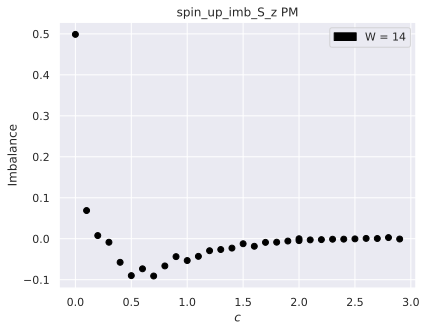

In [6]:
cmap = plt.cm.cubehelix
# couplings = [0, 0.5, 1, 1.5, 2, 2.5, 3.0]
disorders = [14]
colors = cmap(np.linspace(0, 1, len(disorders)))

df = dfcharge
valuecharge = "spin_up_imb_charge"
valuespin = "spin_up_imb_S_z"
imb_type = "PM"

for i in range(len(disorders)):  
    # coupling = couplings[i]
    disorder = disorders[i]
    dataspin = dfspin.loc[np.isclose(dfspin["disorder"], disorder)]
    datacharge = dfcharge.loc[np.isclose(dfcharge["disorder"], disorder)]
    x = np.array(dataspin["coupling"])[:-1]
    y = np.real(np.diff(datacharge[valuecharge]))/0.1 - np.real(np.diff(dataspin[valuespin]))/0.1
    # yerr = np.sqrt(-np.real(data[value + "_var"]))
    labels = data["disorder"]
    cmap = plt.cm.viridis
    # plt.plot(x, y, marker="o", label=f"Random W = {disorder}")
    for j in range(len(x)):
        # plt.errorbar(x[j], y[j], yerr=yerr[j], linestyle="", marker=".",
        #              color=colors[i], capsize=5, label=f"L = {length}")
        plt.scatter(x[j], y[j], marker="o",
                     color=colors[i], label=f"L = {length}")


        
plt.ylabel("Imbalance")
plt.xlabel(r"$c$")
plt.title(value + " " + imb_type)
plt.legend()


handles = []
for i in range(len(disorders)):
    handles.append(mpl.patches.Patch(color=colors[i], label=f"W = {disorders[i]}"))
# plt.legend(handles=handles, bbox_to_anchor=(1.3,1.0), loc="upper right")
plt.legend(handles=handles, loc="upper right")